In [5]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import os
import matplotlib.pyplot as plt#visualization


df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())




#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    
    

X_org=df.copy()

#Tenure to categorical column
def tenure_lab(t) :
    
    if t <= 12 :
        return "Tenure_0-12"
    elif (t > 12) & (t <= 24 ):
        return "Tenure_12-24"
    elif (t > 24) & (t <= 48) :
        return "Tenure_24-48"
    elif (t > 48) & (t <= 60) :
        return "Tenure_48-60"
    elif t > 60 :
        return "Tenure_gt_60"

X_org["tenure_groups"]=X_org["tenure"].map(tenure_lab)

#X_org contains the data before all the variables get converted dummies and contains manipulated tenure with few categories

X=X_org.drop('Churn',1)
X=X.drop('tenure',1)
Y=X_org.Churn

X=X.drop('customerID',1)
todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]


for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)


In [6]:
todummy_list

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_groups']

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
'''std = StandardScaler()
scaled = std.fit_transform(X[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

X=X.drop(num_cols,1)
print (X.isnull().sum())

#HAVE TO READ ABOUT "merge()"
#X=pd.concat([X,scaled ],axis=1)
X = X.merge(scaled,left_index=True,right_index=True,how = "left")'''

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")

#print (X.isnull().sum())

#Converting strings Yes?No as 0's and 1's
le = LabelEncoder()
Y= le.fit_transform(Y)


In [8]:
Y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

             precision    recall  f1-score   support

          0       0.86      0.90      0.88      1046
          1       0.66      0.58      0.62       361

avg / total       0.81      0.82      0.81      1407

[[940 106]
 [151 210]]


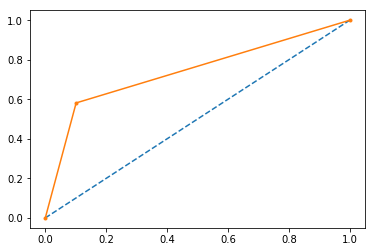

AUC: 0.740


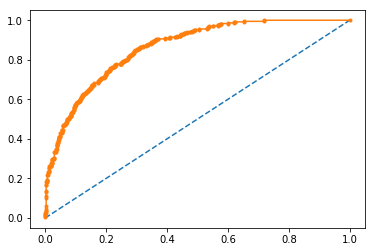

AUC: 0.862


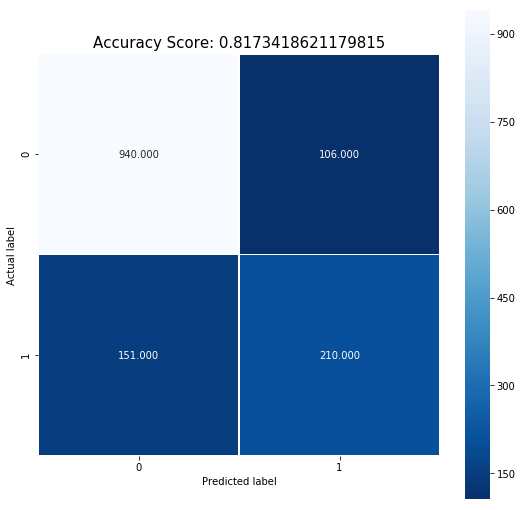

In [9]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Unprocessed}---------------------------------"""

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=10)


from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)




from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
probs = m.predict_proba(x_test)
probs = probs[:, 1]


fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

#plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr1, tpr1, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import seaborn as sns

score = logisticRegr.score(x_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);



In [10]:
k=df["Churn"].value_counts().keys().tolist()

In [11]:
k

['No', 'Yes']

In [12]:
val = df["Churn"].value_counts().values.tolist()

In [13]:
val

[5163, 1869]

             precision    recall  f1-score   support

          0       0.91      0.67      0.77      1038
          1       0.47      0.81      0.59       369

avg / total       0.79      0.71      0.73      1407

[[698 340]
 [ 70 299]]


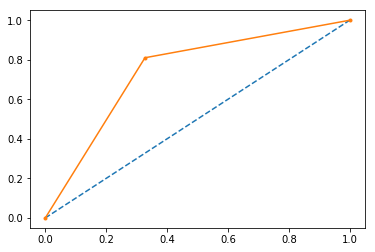

AUC: 0.741


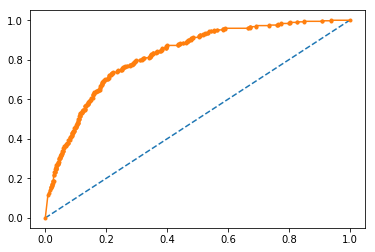

AUC: 0.823


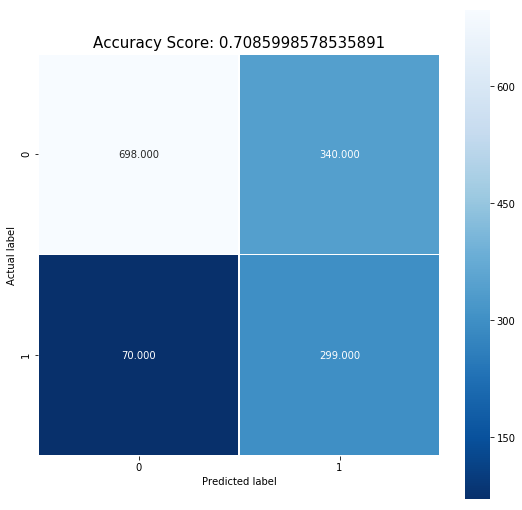

In [14]:
"""--------------------------(MODELING PHASE)--{Naive Bayes_Unprocessed}---------------------------------"""


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
m=gnb.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, predictions)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
probs = m.predict_proba(x_test)
probs = probs[:, 1]


fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

#plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr1, tpr1, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import seaborn as sns

score = gnb.score(x_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


             precision    recall  f1-score   support

          0       0.84      0.91      0.87      1038
          1       0.67      0.51      0.58       369

avg / total       0.79      0.81      0.80      1407

[[945  93]
 [181 188]]


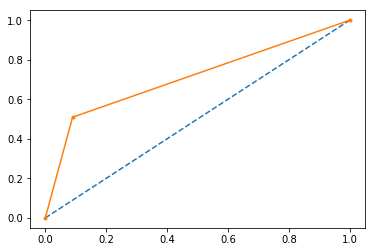

AUC: 0.710


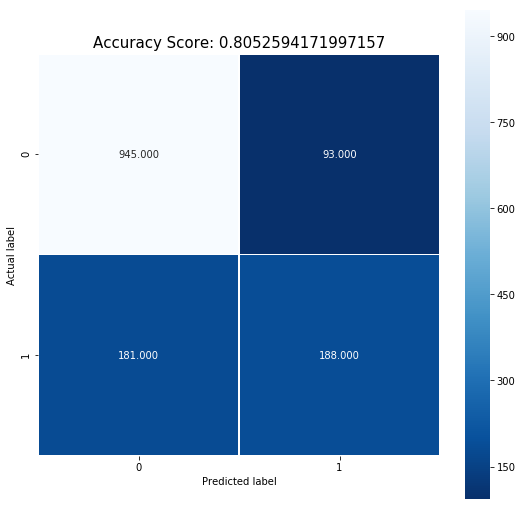

In [16]:
"""--------------------------(MODELING PHASE)--{S.V.M_Unprocessed}---------------------------------"""

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)


from sklearn.svm import SVC
SVM=SVC(kernel='linear',random_state=0)#,probability=1)
m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)



from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)



import matplotlib.pyplot as plt
import seaborn as sns

score = SVM.score(x_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


             precision    recall  f1-score   support

          0       0.84      0.89      0.87      1046
          1       0.62      0.52      0.56       361

avg / total       0.79      0.80      0.79      1407

[[934 112]
 [175 186]]


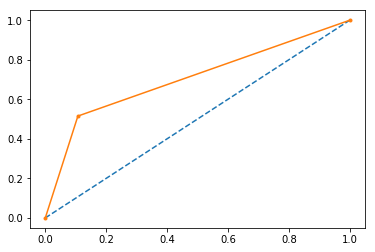

AUC: 0.704


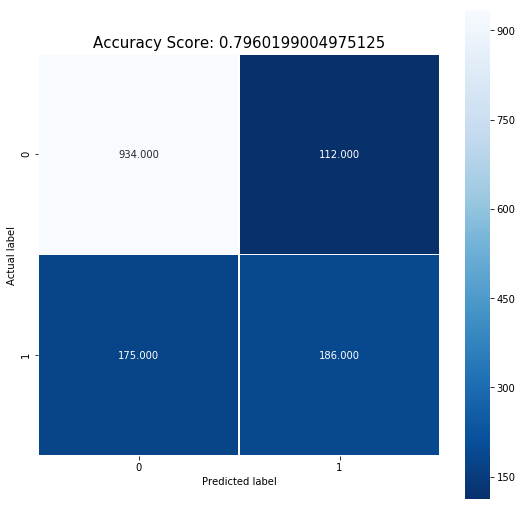

In [17]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_Unprocessed}--------------------"""


from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=10)

clf_gini = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)


import matplotlib.pyplot as plt
import seaborn as sns

score = clf_gini.score(x_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [18]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using entropy )_Unprocessed}--------------------"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

def train_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 


clf_entropy = train_using_entropy(x_train, x_test, y_train)

In [19]:
predictions=clf_entropy.predict(x_test)

In [20]:
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1014
          1       0.54      0.60      0.57       393

avg / total       0.76      0.75      0.75      1407

[[812 202]
 [156 237]]


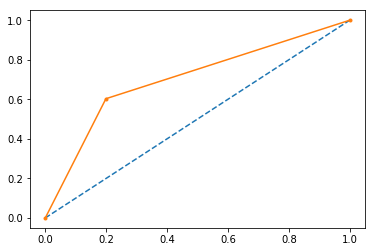

AUC: 0.702


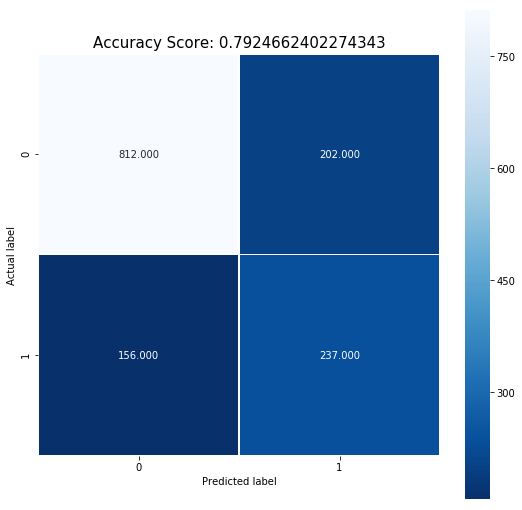

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, predictions)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, predictions)
print('AUC: %.3f' % auc)
'''probs = m.predict_proba(x_test)
probs = probs[:, 1]


fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

#plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr1, tpr1, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)'''


import matplotlib.pyplot as plt
import seaborn as sns

score = SVM.score(x_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


<--------------------------------------K-fold logistic regression------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7134486289680282
 ROC_AUC FOR FOLD  2 is 0.7235749231994537
 ROC_AUC FOR FOLD  3 is 0.704915234952782
 ROC_AUC FOR FOLD  4 is 0.734506487584463
 ROC_AUC FOR FOLD  5 is 0.6968038801144136
 ROC_AUC FOR FOLD  6 is 0.7036593707250342
 ROC_AUC FOR FOLD  7 is 0.7507461758487751
 ROC_AUC FOR FOLD  8 is 0.7167226298553248
 ROC_AUC FOR FOLD  9 is 0.7126134809103345
 ROC_AUC FOR FOLD  10 is 0.7319954988747187


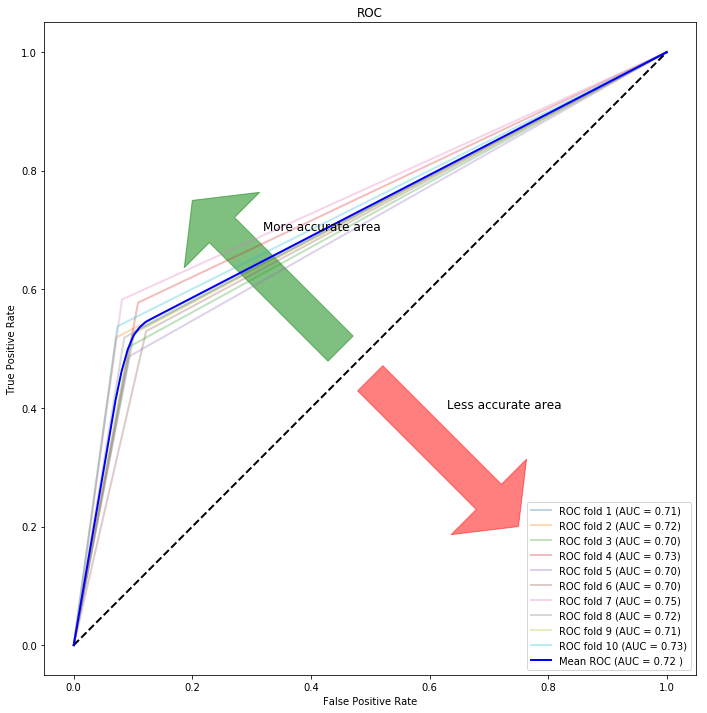

In [22]:
print("<--------------------------------------K-fold logistic regression------------------------------------->")
# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.735224586288416
 ROC_AUC FOR FOLD  2 is 0.7043959519291588
 ROC_AUC FOR FOLD  3 is 0.7327998680085794
 ROC_AUC FOR FOLD  4 is 0.7042844592262558
 ROC_AUC FOR FOLD  5 is 0.7294572053595844
 ROC_AUC FOR FOLD  6 is 0.7103106302762069
 ROC_AUC FOR FOLD  7 is 0.695163631256145
 ROC_AUC FOR FOLD  8 is 0.718077183480027
 ROC_AUC FOR FOLD  9 is 0.7523786407766991
 ROC_AUC FOR FOLD  10 is 0.6940760389036251


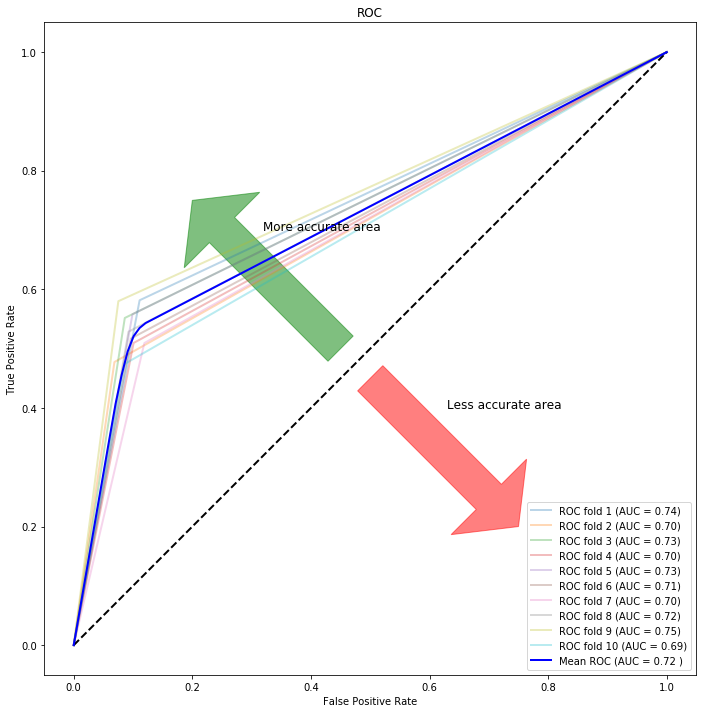

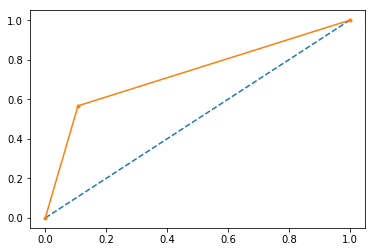

AUC: 0.730


In [23]:
print("<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->")

from sklearn.model_selection import train_test_split

x_train_eighty, x_test_twenty, y_train_eighty, y_test_twenty = train_test_split(X, Y, test_size=0.20, random_state=20)

# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_train_eighty, y_train_eighty)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_train_eighty,y_train_eighty ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

pred_test=m.predict(x_test_twenty)
fpr, tpr, thresholds = roc_curve(y_test_twenty, pred_test)


#plot no skill
from matplotlib import pyplot
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

auc = roc_auc_score(y_test_twenty,pred_test )
print('AUC: %.3f' % auc)

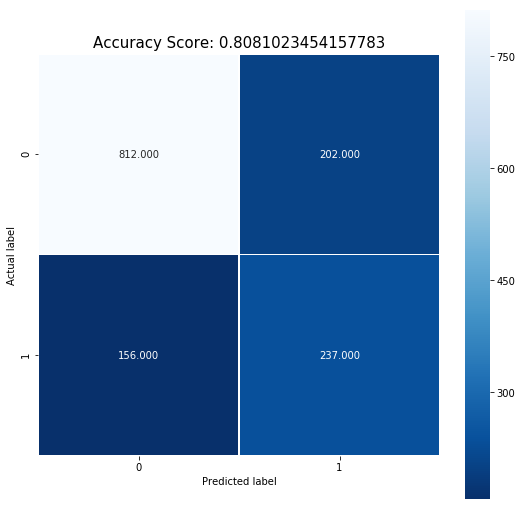

In [24]:
score = m.score(x_test_twenty, y_test_twenty)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [25]:
pred_metric = m.predict(x_test_twenty)
from sklearn import metrics
mett=metrics.classification_report(y_test_twenty,pred_metric)
print (mett)

cm = metrics.confusion_matrix(y_test_twenty, pred_metric)
print(cm)

             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1042
          1       0.65      0.57      0.61       365

avg / total       0.80      0.81      0.80      1407

[[930 112]
 [158 207]]


<--------------------------------------K-fold S.V.M------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7071339173967458
 ROC_AUC FOR FOLD  2 is 0.7128797360336785
 ROC_AUC FOR FOLD  3 is 0.6910342473546479
 ROC_AUC FOR FOLD  4 is 0.7162562699498405
 ROC_AUC FOR FOLD  5 is 0.692425278779588
 ROC_AUC FOR FOLD  6 is 0.6958711603034449
 ROC_AUC FOR FOLD  7 is 0.7245108402769141
 ROC_AUC FOR FOLD  8 is 0.6873108651494425
 ROC_AUC FOR FOLD  9 is 0.6985086846577955
 ROC_AUC FOR FOLD  10 is 0.7246811702925731


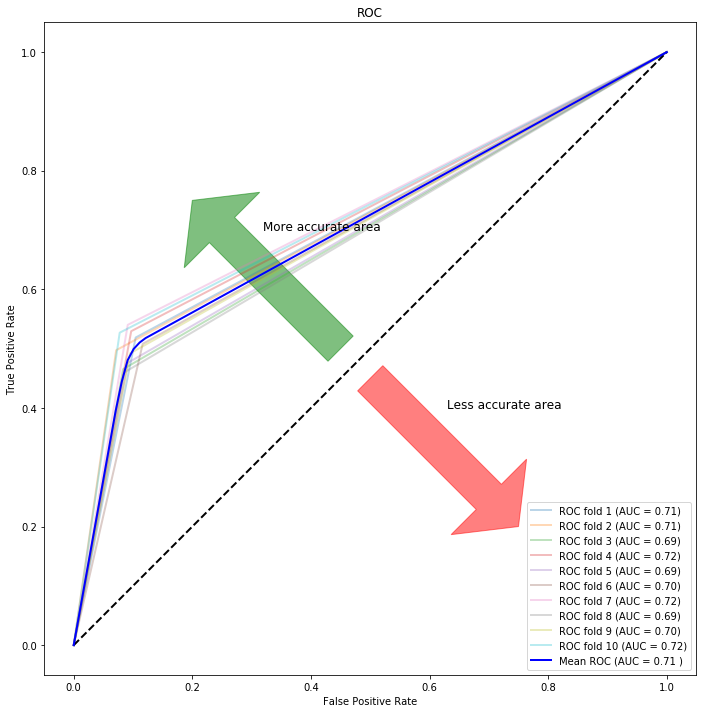

In [26]:
print("<--------------------------------------K-fold S.V.M------------------------------------->")
# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=SVM.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<--------------------------------------K-fold NB------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7551484810558653
 ROC_AUC FOR FOLD  2 is 0.7538969166002958
 ROC_AUC FOR FOLD  3 is 0.7367163499829333
 ROC_AUC FOR FOLD  4 is 0.756223313849853
 ROC_AUC FOR FOLD  5 is 0.778852132819301
 ROC_AUC FOR FOLD  6 is 0.7057631720764417
 ROC_AUC FOR FOLD  7 is 0.7450980392156863
 ROC_AUC FOR FOLD  8 is 0.7309932429631473
 ROC_AUC FOR FOLD  9 is 0.742154790034407
 ROC_AUC FOR FOLD  10 is 0.753563390847712


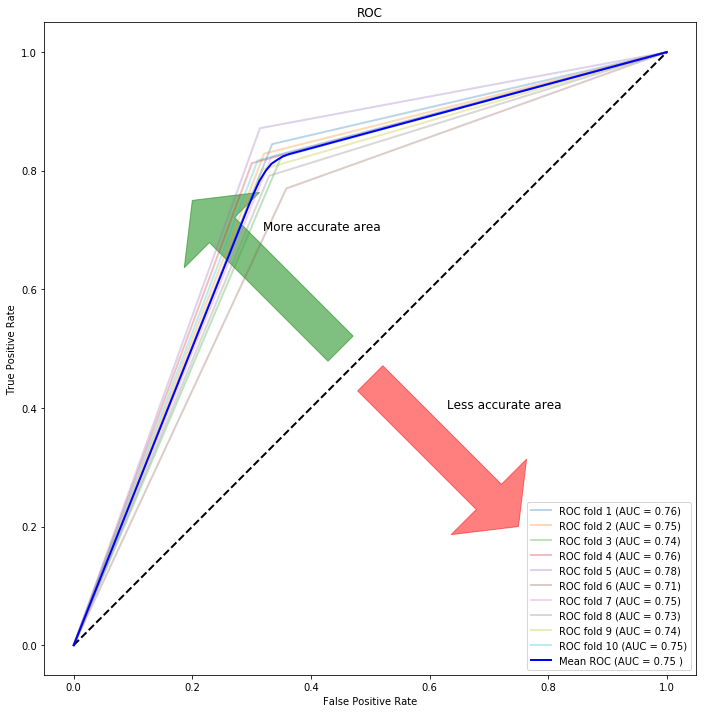

In [27]:
print("<--------------------------------------K-fold NB------------------------------------->")
# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()


<--------------------------------------K-fold DECISION TREE(GINI)------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.6967800659915804
 ROC_AUC FOR FOLD  2 is 0.674308795084765
 ROC_AUC FOR FOLD  3 is 0.6587780179770167
 ROC_AUC FOR FOLD  4 is 0.6718069891804502
 ROC_AUC FOR FOLD  5 is 0.6521214193922812
 ROC_AUC FOR FOLD  6 is 0.670407909463997
 ROC_AUC FOR FOLD  7 is 0.6981148696264975
 ROC_AUC FOR FOLD  8 is 0.6805641918501015
 ROC_AUC FOR FOLD  9 is 0.664251958711603
 ROC_AUC FOR FOLD  10 is 0.6795136284071017


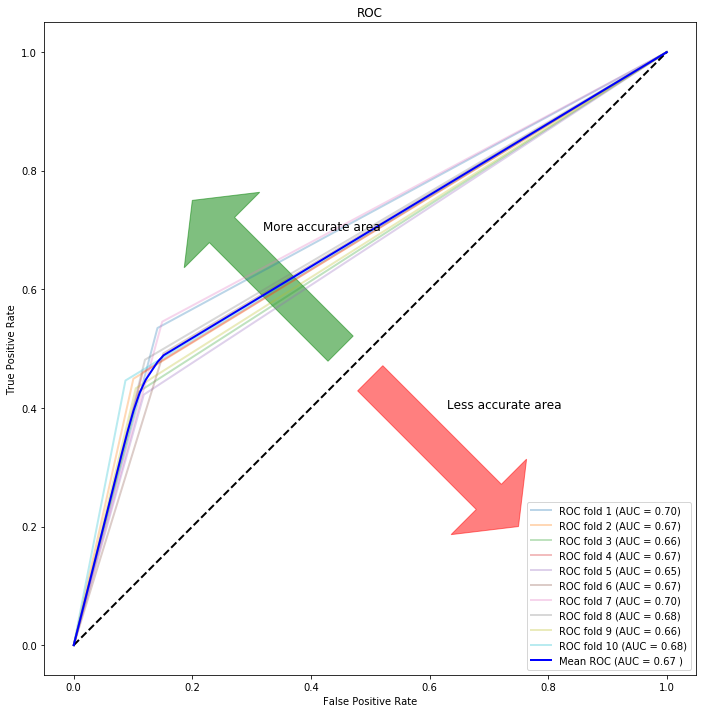

In [28]:
print("<--------------------------------------K-fold DECISION TREE(GINI)------------------------------------->")

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf =1,max_depth=10,max_features=2) 

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf_gini .fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()



<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7003640914779837
 ROC_AUC FOR FOLD  2 is 0.6854590965980203
 ROC_AUC FOR FOLD  3 is 0.6735692342701104
 ROC_AUC FOR FOLD  4 is 0.687580317539278
 ROC_AUC FOR FOLD  5 is 0.6771545827633378
 ROC_AUC FOR FOLD  6 is 0.6543288562782407
 ROC_AUC FOR FOLD  7 is 0.7069964349376114
 ROC_AUC FOR FOLD  8 is 0.6933942710276499
 ROC_AUC FOR FOLD  9 is 0.680061559507524
 ROC_AUC FOR FOLD  10 is 0.7037071767941985


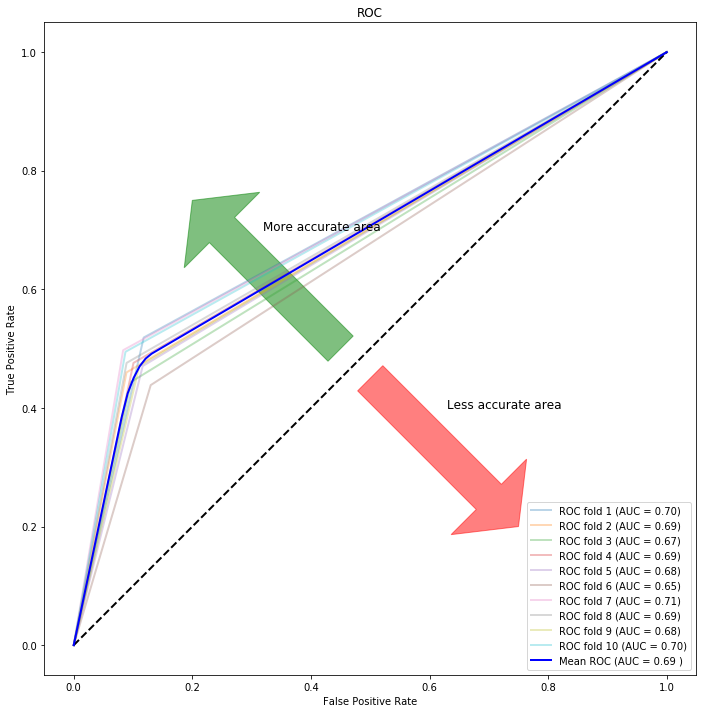

In [29]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7226646945044942
 ROC_AUC FOR FOLD  2 is 0.7357492319945386
 ROC_AUC FOR FOLD  3 is 0.6959267265900557
 ROC_AUC FOR FOLD  4 is 0.7378798242341335
 ROC_AUC FOR FOLD  5 is 0.6866113252912159
 ROC_AUC FOR FOLD  6 is 0.7136187455954898
 ROC_AUC FOR FOLD  7 is 0.7252103801351407
 ROC_AUC FOR FOLD  8 is 0.6977728723624756
 ROC_AUC FOR FOLD  9 is 0.7060637151266426
 ROC_AUC FOR FOLD  10 is 0.7146786696674169


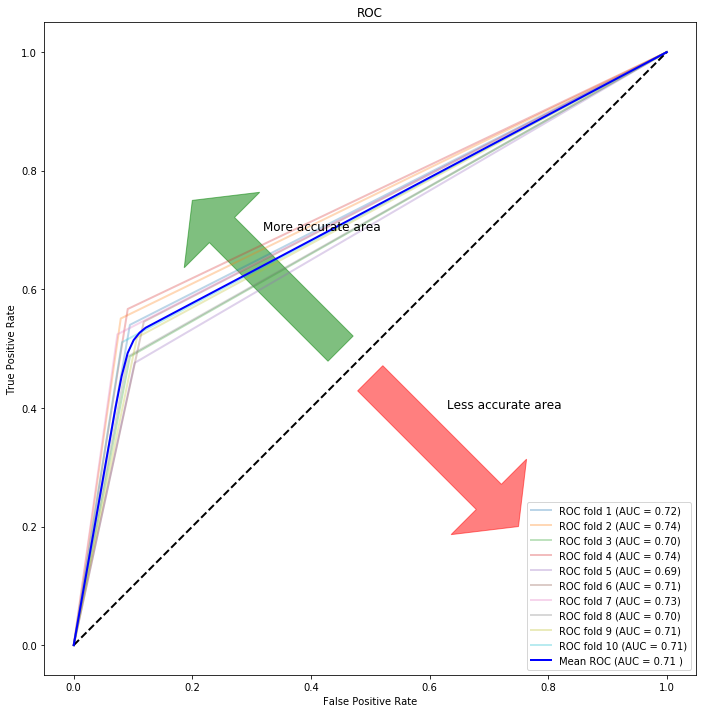

In [30]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(X,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()